In [1]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 10 лет
# usd2= pd.read_excel('usd_.xlsx')
# usd2

In [3]:
# usd_rate.xlsx usd_.xlsx
# 3 года
dataframe= pd.read_excel('usd_rate.xlsx')
dataframe.head()

,nominal,data,curs,cdx
0,1,2017-08-01,60.0633,Доллар США
1,1,2017-08-02,59.8454,Доллар США
2,1,2017-08-03,60.5819,Доллар США
3,1,2017-08-04,60.7503,Доллар США
4,1,2017-08-05,60.3281,Доллар США


In [4]:
rate = dataframe.curs
rate

0      60.0633
1      59.8454
2      60.5819
3      60.7503
4      60.3281
        ...   
733    71.5850
734    71.9196
735    72.2348
736    73.3633
737    73.4261
Name: curs, Length: 738, dtype: float64

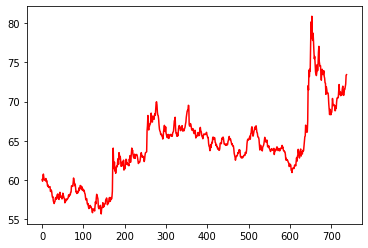

In [5]:
plt.plot(rate, color = 'r')
plt.show()

In [6]:
past = 28 
# 4 недели для прогноза из прошлого

In [7]:
length = len(rate)
count = length - past
print(f'с {past} по {length} день\nвсего - {count} дней')

с 28 по 738 день
всего - 710 дней


In [8]:
past_days= []
current_days= []
for day in range(past, length):
    past_days.append(list(rate[(day-past):day])) #0:29
    current_days.append(rate[day])   #29 rate[day:day+3]

In [9]:
past_columns = []
for i in range(past):
    past_columns.append(f'past_{i}')

In [10]:
X = pd.DataFrame(data = past_days, columns=past_columns)

In [11]:
y = pd.Series(current_days, name = 'target')

In [12]:
# train
X_train = X[:-10]
y_train = y[:-10]

In [13]:
# test
X_test = X[-10:]
y_test = y[-10:]

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
scores= pd.DataFrame()
def predictions_plots(model,model_name, features= True):
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    
    number = len(scores)
    scores.loc[number,'model'] = model_name
    scores.loc[number,'score'] = mean_absolute_error(prediction,y_test)
    print(scores)
    
    plt.plot(prediction, label = 'Predicton '+model_name, color='r')
    plt.plot(list(y_test),label = 'Real', color='g')
    plt.legend()
    plt.show()

# -----------------
    if features:  
        try:
            imp = pd.Series(list(model.coef_), name='importances') 
        except AttributeError:
            imp = pd.Series(list(model.feature_importances_), name='importances') 
        cols = pd.Series(past_columns, name='columns')
        df = pd.DataFrame(cols)
        df['imp'] = imp
        print(df)

In [16]:
from sklearn.linear_model import LinearRegression

              model     score
0  LinearRegression  0.415963


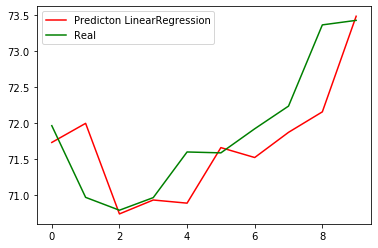

    columns       imp
0    past_0  0.039324
1    past_1 -0.086728
2    past_2  0.049472
3    past_3 -0.010744
4    past_4  0.046257
5    past_5 -0.123448
6    past_6  0.152137
7    past_7 -0.085485
8    past_8  0.029402
9    past_9 -0.037413
10  past_10  0.069960
11  past_11 -0.119729
12  past_12  0.027159
13  past_13  0.081719
14  past_14 -0.054678
15  past_15 -0.003655
16  past_16  0.125869
17  past_17 -0.078727
18  past_18 -0.077024
19  past_19  0.103389
20  past_20 -0.073673
21  past_21  0.029959
22  past_22 -0.097939
23  past_23  0.085521
24  past_24 -0.012518
25  past_25 -0.015320
26  past_26  0.008524
27  past_27  1.019399


In [17]:
predictions_plots(LinearRegression(),'LinearRegression')

In [18]:
from sklearn.ensemble import RandomForestRegressor

                   model     score
0       LinearRegression  0.415963
1  RandomForestRegressor  0.602183


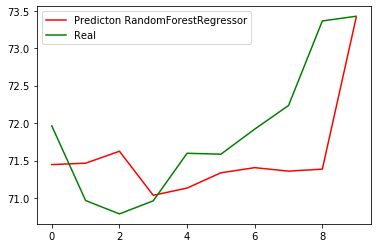

    columns       imp
0    past_0  0.000675
1    past_1  0.000651
2    past_2  0.000455
3    past_3  0.000266
4    past_4  0.000361
5    past_5  0.000903
6    past_6  0.000365
7    past_7  0.000494
8    past_8  0.000645
9    past_9  0.000318
10  past_10  0.000420
11  past_11  0.000345
12  past_12  0.000612
13  past_13  0.000368
14  past_14  0.000574
15  past_15  0.000317
16  past_16  0.000424
17  past_17  0.000321
18  past_18  0.000369
19  past_19  0.000436
20  past_20  0.000586
21  past_21  0.000548
22  past_22  0.000682
23  past_23  0.000354
24  past_24  0.001536
25  past_25  0.009711
26  past_26  0.040899
27  past_27  0.936368


In [19]:
predictions_plots(RandomForestRegressor(),'RandomForestRegressor')

                   model     score
0       LinearRegression  0.415963
1  RandomForestRegressor  0.602183
2  LinearRegression_norm  0.415963


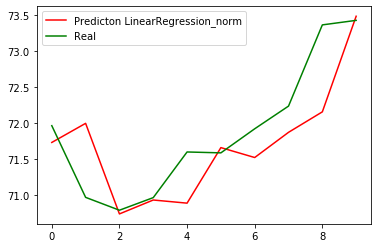

    columns       imp
0    past_0  0.039324
1    past_1 -0.086728
2    past_2  0.049472
3    past_3 -0.010744
4    past_4  0.046257
5    past_5 -0.123448
6    past_6  0.152137
7    past_7 -0.085485
8    past_8  0.029402
9    past_9 -0.037413
10  past_10  0.069960
11  past_11 -0.119729
12  past_12  0.027159
13  past_13  0.081719
14  past_14 -0.054678
15  past_15 -0.003655
16  past_16  0.125869
17  past_17 -0.078727
18  past_18 -0.077024
19  past_19  0.103389
20  past_20 -0.073673
21  past_21  0.029959
22  past_22 -0.097939
23  past_23  0.085521
24  past_24 -0.012518
25  past_25 -0.015320
26  past_26  0.008524
27  past_27  1.019399


In [20]:
predictions_plots(LinearRegression(normalize=True),'LinearRegression_norm')

In [21]:
from sklearn.neural_network import MLPRegressor

                   model     score
0       LinearRegression  0.415963
1  RandomForestRegressor  0.602183
2  LinearRegression_norm  0.415963
3           MLPRegressor  0.837095


/Users/annamaslova/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


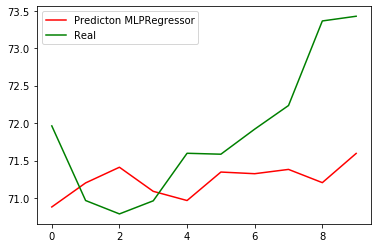

In [22]:
predictions_plots(MLPRegressor(),'MLPRegressor', features=False)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

                   model     score
0       LinearRegression  0.415963
1  RandomForestRegressor  0.602183
2  LinearRegression_norm  0.415963
3           MLPRegressor  0.837095
4  KNeighborsRegressor_3  0.837817


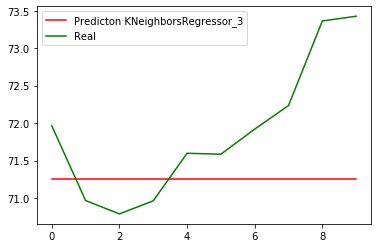

In [24]:
predictions_plots(KNeighborsRegressor(n_neighbors=3),'KNeighborsRegressor_3',features=False)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

                       model     score
0           LinearRegression  0.415963
1      RandomForestRegressor  0.602183
2      LinearRegression_norm  0.415963
3               MLPRegressor  0.837095
4      KNeighborsRegressor_3  0.837817
5  GradientBoostingRegressor  0.691488


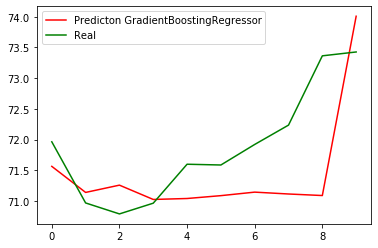

    columns       imp
0    past_0  0.000519
1    past_1  0.000501
2    past_2  0.000227
3    past_3  0.000218
4    past_4  0.000785
5    past_5  0.001114
6    past_6  0.000280
7    past_7  0.001000
8    past_8  0.001441
9    past_9  0.000127
10  past_10  0.000463
11  past_11  0.000132
12  past_12  0.000843
13  past_13  0.000241
14  past_14  0.000357
15  past_15  0.000181
16  past_16  0.000909
17  past_17  0.000336
18  past_18  0.000472
19  past_19  0.000384
20  past_20  0.000747
21  past_21  0.000704
22  past_22  0.000612
23  past_23  0.000281
24  past_24  0.000322
25  past_25  0.000863
26  past_26  0.001157
27  past_27  0.984781


In [26]:
predictions_plots(GradientBoostingRegressor(n_estimators=1000, max_depth=10),
                  'GradientBoostingRegressor')